In [ ]:
import subprocess

# Step 1: Create the PHREEQC input file
input_file_content = """
SOLUTION 1
    temp      25         # Temperature in Celsius
    pH        7.0        # Assumed pH (adjust if needed)
    pe        4.0        # Assumed pe (adjust if needed)
    units     mol/kgw    # Input concentrations in molality (mol/kg water)
    Na        0.538
    Cl        0.486
    S(6)      0.109      # Sulfate (SO4^2-)
    Mg        0.058
    Ca        0.024
    K         0.007
    C(+4)      0.004      # Bicarbonate
#    CO3-2       0.000033   # Carbonate
    Ba        0.0000005  # Barium


PHASES
Magnesite
    MgCO3 = Mg+2 + CO3-2
    log_k -7.56  # Solubility constant at 25°C from literature
    delta_h -22.0 kcal  # Enthalpy of reaction (optional)

REACTION 4
    H2O  1.0 # Remove 90% of water, simulating evaporation
    -52.0 moles in 4 steps 
    
SELECTED_OUTPUT
    -file evaporation_results.txt
    -reset false  # Keeps data from all steps in the output file
    -step
    -totals H2O Na Cl S(6) Mg Ca K HCO3 CO3 Ba
    -saturation_indices Calcite Gypsum Halite Sylvite Barite Magnesite Anhydrite    

END
"""

# Save the input file
input_file_name = "evaporation.pqi"
with open(input_file_name, "w") as file:
    file.write(input_file_content)
print(f"PHREEQC input file '{input_file_name}' created successfully.")

In [ ]:
# Step 2: Run PHREEQC using subprocess
output_file_name = "evaporation.out"
database_file = "/Users/cpinilla/software/phreeqc-3.7.3-15968/database/phreeqc.dat"  # Update the path if necessary
phreeqc_executable = "/Users/cpinilla/software/phreeqc-3.7.3-15968/src/phreeqc"  # Use "phreeqc.exe" on Windows, or the full path to the executable

# Run PHREEQC
try:
    subprocess.run([phreeqc_executable, input_file_name, output_file_name, database_file], check=True)
    print(f"PHREEQC run completed. Output saved in '{output_file_name}'.")
except subprocess.CalledProcessError as e:
    print(f"PHREEQC execution failed: {e}")    

# Display the contents of the output file, ignoring problematic characters
#try:
#    with open(output_file_name, "r", encoding="utf-8", errors="ignore") as output_file:
#        output_content = output_file.read()
#    print("PHREEQC Output:\n")
#    print(output_content)
#except FileNotFoundError:
#    print(f"Output file '{output_file_name}' not found.")

In [19]:
# Display the contents of the output file, ignoring problematic characters
try:
    with open(output_file_name, "r", encoding="utf-8", errors="ignore") as output_file:
        output_content = output_file.read()
    print("PHREEQC Output:\n")
    print(output_content)
except FileNotFoundError:
    print(f"Output file '{output_file_name}' not found.")

PHREEQC Output:

   Input file: evaporation.pqi
  Output file: evaporation.out
Database file: /Users/cpinilla/software/phreeqc-3.7.3-15968/database/phreeqc.dat

------------------
Reading data base.
------------------

	SOLUTION_MASTER_SPECIES
	SOLUTION_SPECIES
	PHASES
	EXCHANGE_MASTER_SPECIES
	EXCHANGE_SPECIES
	SURFACE_MASTER_SPECIES
	SURFACE_SPECIES
	RATES
	END
------------------------------------
Reading input data for simulation 1.
------------------------------------

	SOLUTION 1
	    temp      25         # Temperature in Celsius
	    pH        7.0        # Assumed pH (adjust if needed)
	    pe        4.0        # Assumed pe (adjust if needed)
	    units     mol/kgw    # Input concentrations in molality (mol/kg water)
	    Na        0.538
	    Cl        0.486
	    S(6)      0.109      # Sulfate (SO4^2-)
	    Mg        0.058
	    Ca        0.024
	    K         0.007
	    C(+4)      0.004      # Bicarbonate
	    Ba        0.0000005  # Barium
	PHASES
	Magnesite
	    MgCO3 = Mg+2 + CO

/var/folders/f1/vx4t6md906z5fb0jhmbsxst40000gn/T/ipykernel_92544/3794004678.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(filename, delim_whitespace=True)


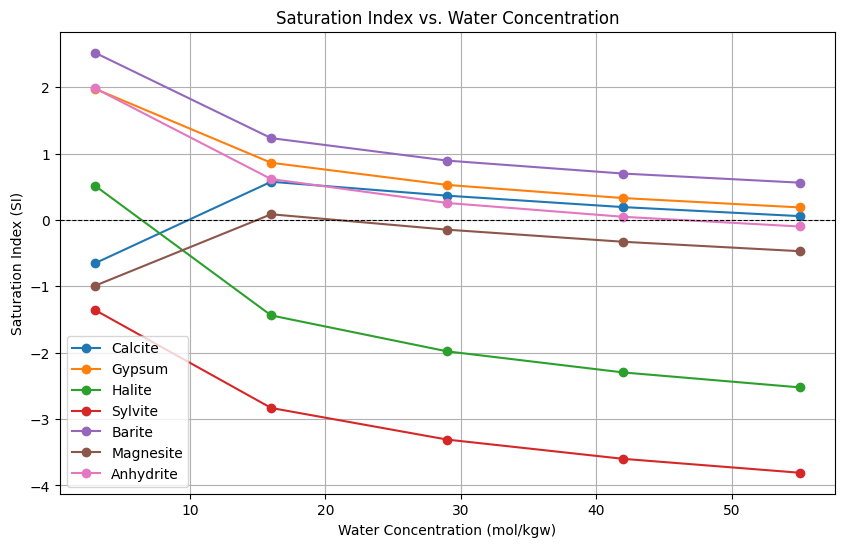

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PHREEQC output data
filename = "evaporation_results.txt"  # Change if your file has a different name
df = pd.read_csv(filename, delim_whitespace=True)

# Define minerals to plot
minerals = ["si_Calcite", "si_Gypsum", "si_Halite", "si_Sylvite", "si_Barite", "si_Magnesite", "si_Anhydrite"]

# Create plot
plt.figure(figsize=(10, 6))

# Plot SI vs. H2O concentration for each mineral
for mineral in minerals:
    plt.plot(55-13*df["step"], df[mineral], marker="o", linestyle="-", label=mineral.replace("si_", ""))

# Formatting
plt.xlabel("Water Concentration (mol/kgw)")
plt.ylabel("Saturation Index (SI)")
plt.title("Saturation Index vs. Water Concentration")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # Line at SI=0 for equilibrium
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
